In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style='darkgrid', rc=None)

# Exercício 1

Através do banco de dados disponibilizado, responda às seguintes perguntas:

- 1) Quantos tiroteios o Instituto Fogo Cruzado registrou em 2024? E qual porcentagem ocorreu em ações policiais? 
- 2) Quantas chacinas foram registradas em 2024? e qual estado registrou menos vítimas desse fenômeno? 
- 3) Quantas pessoas foram vítimas de balas perdidas em 2024? E quantas vítimas teve o estado com mais casos? 
- 4) Qual bairro registrou mais tiroteios? 
- 5) Quantas crianças foram baleadas dentro de casa em 2024? E quantas delas morreram? 
- 6) Quantos garis (funcionários de limpeza urbana) foram baleados em 2024?

In [3]:
df_ocorrencias = pd.read_excel('dados_ex1.xlsx', sheet_name='Ocorrencias')
df_ocorrencias.shape

(6769, 26)

In [4]:
df_ocorrencias = df_ocorrencias.query('uf != "Pará"').copy()

In [5]:
df_vitimas = pd.read_excel('dados_ex1.xlsx', sheet_name='Vitimas')
df_vitimas.shape

(5936, 39)

In [6]:
df_vitimas = df_vitimas.query('uf != "Pará"').copy()

In [7]:
df_ocorrencias.columns

Index(['id_ocorrencia', 'uf', 'cidade', 'endereco', 'bairro', 'sub_bairro',
       'localidade', 'latitude', 'longitude', 'data_ocorrencia',
       'data de cadastro', 'última atualização', 'fonte_ocorrencia',
       'presenca_agentes', 'acao_policial', 'civis_mortos_ocorrencia',
       'civis_feridos_ocorrencia', 'agentes_mortos_ocorrencia',
       'agentes_feridos_ocorrencia', 'chacina_ocorrencia',
       'unidades_policiais', 'motivo_principal', 'motivos_complementares',
       'outros_recortes', 'transporte_interrompido', 'ocorrencia_relacionada'],
      dtype='object')

In [8]:
df_vitimas.columns

Index(['id_ocorrencia', 'uf', 'endereco', 'cidade', 'bairro', 'sub_bairro',
       'localidade', 'latitude', 'longitude', 'data_ocorrencia',
       'hora_ocorrencia', 'presenca_agentes', 'acao_policial',
       'unidades_policiais', 'motivo_principal', 'motivos_complementares',
       'outros_recortes', 'ocorrencia_relacionada', 'id_vitima', 'tipo',
       'situacao', 'data_morte', 'idade', 'faixa_etaria', 'raca', 'genero',
       'local', 'circunstancias_vitima', 'qualificacoes_vitima',
       'status_servico', 'observacoes_gerais', 'status_politico',
       'posicao_politico', 'partido_político', 'unidade_agente',
       'posicao_agente', 'coorporacao_agente', 'status_agente', 'tipo_pessoa'],
      dtype='object')

In [9]:
df_ocorrencias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6075 entries, 0 to 6768
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id_ocorrencia               6075 non-null   int64         
 1   uf                          6075 non-null   object        
 2   cidade                      6075 non-null   object        
 3   endereco                    6075 non-null   object        
 4   bairro                      6075 non-null   object        
 5   sub_bairro                  477 non-null    object        
 6   localidade                  2480 non-null   object        
 7   latitude                    6075 non-null   float64       
 8   longitude                   6075 non-null   float64       
 9   data_ocorrencia             6075 non-null   datetime64[ns]
 10  data de cadastro            6075 non-null   datetime64[ns]
 11  última atualização          6075 non-null   datetime64[ns]
 1

In [10]:
df_vitimas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5250 entries, 0 to 5935
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_ocorrencia           5250 non-null   int64         
 1   uf                      5250 non-null   object        
 2   endereco                5250 non-null   object        
 3   cidade                  5250 non-null   object        
 4   bairro                  5250 non-null   object        
 5   sub_bairro              446 non-null    object        
 6   localidade              1851 non-null   object        
 7   latitude                5250 non-null   float64       
 8   longitude               5250 non-null   float64       
 9   data_ocorrencia         5250 non-null   datetime64[ns]
 10  hora_ocorrencia         5250 non-null   object        
 11  presenca_agentes        5250 non-null   object        
 12  acao_policial           5250 non-null   object       

In [11]:
df_ocorrencias.describe().T

,count,mean,min,25%,50%,75%,max,std
id_ocorrencia,6075.0,65277.729547,61678.0,63447.0,65247.0,67102.5,69532.0,2107.698341
latitude,6075.0,-15.647213,-23.052443,-22.839597,-12.949664,-8.180091,-7.53364,6.3686
longitude,6075.0,-39.464603,-43.822548,-43.302781,-38.481896,-35.017575,-34.80917,3.522366
data_ocorrencia,6075,2024-06-23 01:38:44.918518528,2024-01-01 00:00:00,2024-03-21 17:55:00,2024-06-17 09:00:00,2024-09-22 22:00:00,2024-12-31 22:30:00,NaN
data de cadastro,6075,2024-06-24 02:49:41.642436608,2024-01-01 08:17:26.387000,2024-03-22 11:17:02.264499968,2024-06-18 10:45:14.800000,2024-09-24 03:06:40.054500096,2025-01-28 18:13:18.217000,NaN
última atualização,6075,2024-07-11 14:14:17.749463552,2024-01-01 08:17:26.387000,2024-04-05 23:17:32.616499968,2024-07-11 23:04:24.616999936,2024-10-18 06:51:17.216999936,2025-01-28 18:45:15.207000,NaN
civis_mortos_ocorrencia,3077.0,1.140721,1.0,1.0,1.0,1.0,6.0,0.467426
civis_feridos_ocorrencia,1198.0,1.309683,1.0,1.0,1.0,1.0,10.0,0.733554
agentes_mortos_ocorrencia,65.0,1.046154,1.0,1.0,1.0,1.0,2.0,0.211451
agentes_feridos_ocorrencia,96.0,1.072917,1.0,1.0,1.0,1.0,3.0,0.298938


In [12]:
df_ocorrencias['uf']

0       Rio de Janeiro
4       Rio de Janeiro
5       Rio de Janeiro
6       Rio de Janeiro
7           Pernambuco
             ...      
6763        Pernambuco
6765        Pernambuco
6766    Rio de Janeiro
6767    Rio de Janeiro
6768    Rio de Janeiro
Name: uf, Length: 6075, dtype: object

In [13]:
df_ocorrencias.describe(include='object').T

,count,unique,top,freq
uf,6075,3,Rio de Janeiro,2532
cidade,6075,48,RIO DE JANEIRO,1689
endereco,6075,5105,"Morro dos Macacos - Vila Isabel, Rio de Janeir...",33
bairro,6075,884,CENTRO,106
sub_bairro,477,191,CURADO IV,14
localidade,2480,885,MORRO DOS MACACOS,81
fonte_ocorrencia,6075,3,Imprensa,4498
presenca_agentes,6075,2,Não,4204
acao_policial,6075,2,Não,4415
chacina_ocorrencia,6075,2,Não,5996


In [14]:
df_ocorrencias.head()

,id_ocorrencia,uf,cidade,endereco,bairro,sub_bairro,localidade,latitude,longitude,data_ocorrencia,...,civis_feridos_ocorrencia,agentes_mortos_ocorrencia,agentes_feridos_ocorrencia,chacina_ocorrencia,unidades_policiais,motivo_principal,motivos_complementares,outros_recortes,transporte_interrompido,ocorrencia_relacionada
0,69532,Rio de Janeiro,SÃO GONÇALO,"Laranjal, São Gonçalo - RJ, Brasil",LARANJAL,NaN,NaN,-22.812829,-42.992906,2024-12-29 13:00:00,...,NaN,NaN,NaN,Não,NaN,Homicidio/Tentativa,NaN,Ataques armados sobre rodas,Não,NaN
4,68984,Rio de Janeiro,RIO DE JANEIRO,"Morro do Fubá (Complexo do Fubá) - Cascadura, ...",CASCADURA,NaN,MORRO DO FUBA (COMPLEXO DO FUBA),-22.892325,-43.333779,2024-12-30 15:00:00,...,NaN,NaN,NaN,Não,NaN,Disputa,NaN,Bar,Não,NaN
5,68982,Rio de Janeiro,SÃO JOÃO DE MERITI,"Jardim Jose Bonifacio, São João de Meriti - R...",VENDA VELHA,JARDIM JOSE BONIFACIO,NaN,-22.795301,-43.361058,2024-12-31 20:00:00,...,NaN,NaN,NaN,Não,NaN,Homicidio/Tentativa,NaN,NaN,Não,NaN
6,68980,Rio de Janeiro,DUQUE DE CAXIAS,Corte 8 (Complexo da Mangueirinha) - Vila Cent...,CENTENARIO,NaN,CORTE 8 (COMPLEXO DA MANGUEIRINHA),-22.772523,-43.309803,2024-12-31 10:30:00,...,NaN,NaN,NaN,Não,PM,Tentativa/Roubo de cargas,Ação policial,NaN,Não,NaN
7,68979,Pernambuco,RECIFE,"Jardim Uchôa - Rua Santa Joana D'arc - Areias,...",AREIAS,NaN,JARDIM UCHOA,-8.100052,-34.936925,2024-12-31 22:30:00,...,NaN,NaN,NaN,Não,NaN,Homicidio/Tentativa,Não identificado,NaN,Não,NaN


In [15]:
df_ocorrencias['fonte_ocorrencia'].unique()

array(['Imprensa', 'Usuário', 'Polícia'], dtype=object)

In [16]:
df_ocorrencias['motivo_principal'].unique()

array(['Homicidio/Tentativa', 'Disputa', 'Tentativa/Roubo de cargas',
       'Ação policial', 'Não identificado', 'Operação policial',
       'Ataque a civis', 'Tentativa/Roubo', 'Tiros a esmo', 'Briga',
       'Tortura', 'Disparo Acidental', 'Outro', 'Arrastão',
       'Sequestro/Cárcere Privado', 'Suicídio', 'Tentativa/Roubo a banco'],
      dtype=object)

In [17]:
df_vitimas.head()

,id_ocorrencia,uf,endereco,cidade,bairro,sub_bairro,localidade,latitude,longitude,data_ocorrencia,...,status_servico,observacoes_gerais,status_politico,posicao_politico,partido_político,unidade_agente,posicao_agente,coorporacao_agente,status_agente,tipo_pessoa
0,69532,Rio de Janeiro,"Laranjal, São Gonçalo - RJ, Brasil",SÃO GONÇALO,LARANJAL,NaN,NaN,-22.812829,-42.992906,2024-12-29,...,Não se aplica,NaN,Não se aplica,Não se aplica,NaN,NaN,Não se aplica,Não se aplica,Não se aplica,Civíl
4,68984,Rio de Janeiro,"Morro do Fubá (Complexo do Fubá) - Cascadura, ...",RIO DE JANEIRO,CASCADURA,NaN,MORRO DO FUBA (COMPLEXO DO FUBA),-22.892325,-43.333779,2024-12-30,...,Não se aplica,NaN,Não se aplica,Não se aplica,NaN,NaN,Não se aplica,Não se aplica,Não se aplica,Civíl
5,68984,Rio de Janeiro,"Morro do Fubá (Complexo do Fubá) - Cascadura, ...",RIO DE JANEIRO,CASCADURA,NaN,MORRO DO FUBA (COMPLEXO DO FUBA),-22.892325,-43.333779,2024-12-30,...,Não se aplica,NaN,Não se aplica,Não se aplica,NaN,NaN,Não se aplica,Não se aplica,Não se aplica,Civíl
6,68982,Rio de Janeiro,"Jardim Jose Bonifacio, São João de Meriti - R...",SÃO JOÃO DE MERITI,VENDA VELHA,JARDIM JOSE BONIFACIO,NaN,-22.795301,-43.361058,2024-12-31,...,Não se aplica,NaN,Não se aplica,Não se aplica,NaN,NaN,Não se aplica,Não se aplica,Não se aplica,Civíl
7,68982,Rio de Janeiro,"Jardim Jose Bonifacio, São João de Meriti - R...",SÃO JOÃO DE MERITI,VENDA VELHA,JARDIM JOSE BONIFACIO,NaN,-22.795301,-43.361058,2024-12-31,...,Não se aplica,NaN,Não se aplica,Não se aplica,NaN,NaN,Não se aplica,Não se aplica,Não se aplica,Civíl


## 1.1 - Quantos tiroteios o Instituto Fogo Cruzado registrou em 2024? E qual porcentagem ocorreu em ações policiais?

Foram registrados 6769 tiroteios em 2024 dos quais 1949 ocorreram em ações policiais.

In [18]:
# Verificando se há a ids duplicados
sum(df_ocorrencias['id_ocorrencia'].duplicated())

0

In [19]:
df_ocorrencias.shape

(6075, 26)

In [20]:
df_ocorrencias['acao_policial'].value_counts()

acao_policial
Não    4415
Sim    1660
Name: count, dtype: int64

In [21]:
df_ocorrencias['motivo_principal'].value_counts()

motivo_principal
Homicidio/Tentativa          2530
Ação policial                1145
Não identificado             1047
Tentativa/Roubo               419
Disputa                       368
Operação policial             318
Briga                          93
Tiros a esmo                   35
Ataque a civis                 34
Tentativa/Roubo de cargas      19
Arrastão                       16
Sequestro/Cárcere Privado      13
Disparo Acidental              11
Tortura                        10
Outro                          10
Suicídio                        6
Tentativa/Roubo a banco         1
Name: count, dtype: int64

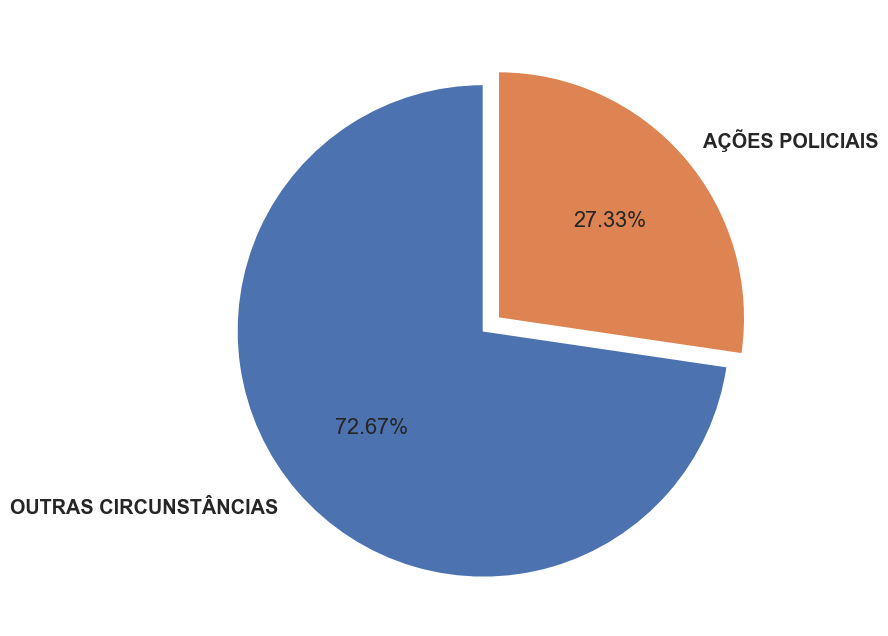

In [22]:
plt.figure(figsize=(8,8))
sns.set(font_scale = 1.3)

labels = df_ocorrencias['acao_policial'].value_counts().index
values = df_ocorrencias['acao_policial'].value_counts()


patches, texts, _ = plt.pie(
    values, 
    labels=['Outras circunstâncias'.upper(), 'Ações policiais'.upper()], 
    autopct='%1.2f%%', 
    colors=sns.color_palette('deep'),
    explode=[0.08, 0],
    startangle=90
)

for text in texts:
    text.set_fontweight('bold')
    #text.set_horizontalalignment('center')

plt.savefig('proporcao_tiroteios.png', bbox_inches='tight')
plt.show()

## 1.2 - Quantas chacinas foram registradas em 2024? e qual estado registrou menos vítimas desse fenômeno?

In [23]:
# Selecionando as ocorrências de chacinas
df_chacinas = df_ocorrencias.query('chacina_ocorrencia == "Sim"').copy()

In [24]:
df_chacinas.shape

(79, 26)

In [25]:
# Selecionando os ids de chacinas
ids_chacinas = df_chacinas['id_ocorrencia']

In [26]:
# Filtrando as vítimas com id de chacinas
vitimas_chacina = df_vitimas[df_vitimas['id_ocorrencia'].isin(ids_chacinas)]

In [27]:
vitimas_chacina.shape

(325, 39)

In [28]:
vitimas_chacina['circunstancias_vitima'].value_counts().to_frame().rename(columns={'count':'Vítimas'})

,Vítimas
circunstancias_vitima,
Chacina,294
"Bala perdida,Chacina",14
"Chacina,Encontro de cadáver",9
Sem identificação,7
"Chacina,Sem identificação",1


In [29]:
vitimas_chacina.query('circunstancias_vitima != "Sem identificação"')['uf'].value_counts()

uf
Rio de Janeiro    208
Bahia              95
Pernambuco         15
Name: count, dtype: int64

In [30]:
df_vitimas['circunstancias_vitima'].value_counts()

circunstancias_vitima
Sem identificação              4533
Chacina                         294
Bala perdida                    185
Encontro de cadáver             176
Feminicídio/tentativa            26
Bala perdida,Chacina             14
Suicídio                         12
Chacina,Encontro de cadáver       9
Chacina,Sem identificação         1
Name: count, dtype: int64

In [31]:
sum(df_vitimas['circunstancias_vitima'].str.contains('Chacina', na=False))

318

## 1.3 - Quantas pessoas foram vítimas de balas perdidas em 2024? E quantas vítimas teve o estado com mais casos?

Em 2024, foram registradas 185 vítimas de bala perdida. No entanto, ao incluir os casos classificados como "bala perdida" e "chacina", o total sobe para 199. Como o contexto dessas ocorrências não está claro, não é possível determinar se há um erro nestes registros.  

Entre os estados, o Rio de Janeiro foi o mais afetado, com 97 (considerando registros de "Bala perdida/") vítimas. 

In [32]:
sum(df_vitimas['circunstancias_vitima'].str.contains('Bala perdida', na=False))

199

In [33]:
df_vitimas.query('circunstancias_vitima == "Bala perdida"').shape

(185, 39)

In [34]:
df_vitimas['circunstancias_vitima'].value_counts().to_frame()

,count
circunstancias_vitima,
Sem identificação,4533
Chacina,294
Bala perdida,185
Encontro de cadáver,176
Feminicídio/tentativa,26
"Bala perdida,Chacina",14
Suicídio,12
"Chacina,Encontro de cadáver",9
"Chacina,Sem identificação",1


In [35]:
vitimas_bala_perdida = df_vitimas.query('circunstancias_vitima == "Bala perdida" or circunstancias_vitima == "Bala perdida,Chacina"')['uf'].value_counts().to_frame()

In [36]:
vitimas_bala_perdida['count']

uf
Rio de Janeiro    111
Pernambuco         49
Bahia              39
Name: count, dtype: int64

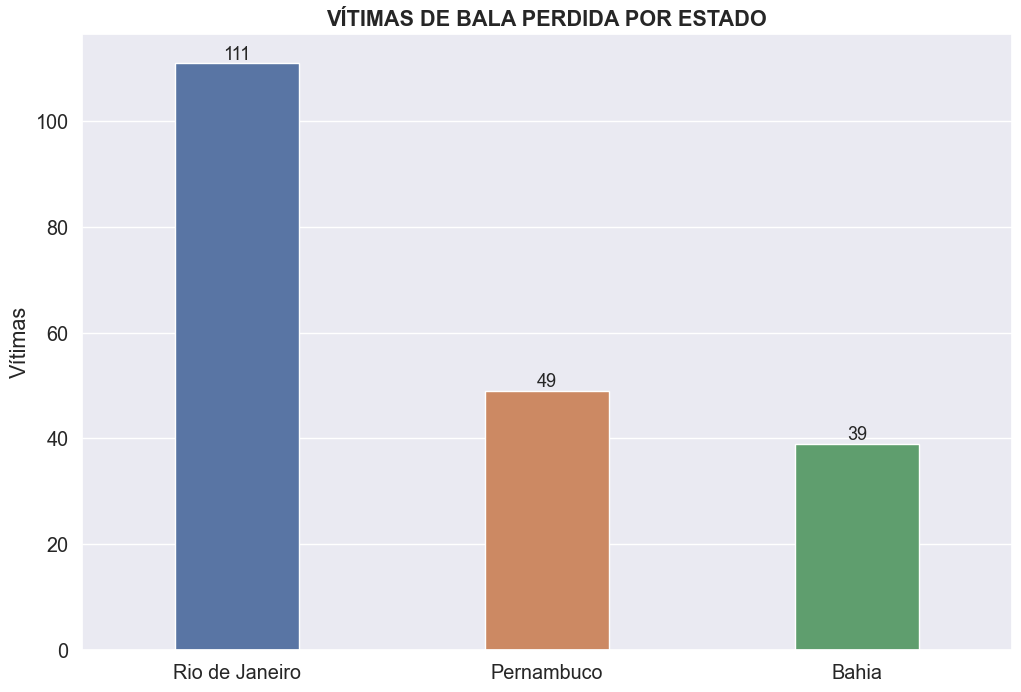

In [37]:
plt.figure(figsize=(12,8))
fig = sns.barplot(vitimas_bala_perdida, x='uf', y='count', width=0.4, hue='uf')

for container in fig.containers:
    fig.bar_label(container, fontsize=13)
    
plt.xlabel('')
plt.ylabel('Vítimas')
plt.title('Vítimas de bala perdida por estado'.upper(), fontdict={'fontweight':'bold'})
plt.savefig('barras_bala_perdida.png', bbox_inches ="tight")
plt.show()

In [38]:
df_vitimas.query('circunstancias_vitima == "Bala perdida"')['uf'].value_counts().to_frame()

,count
uf,
Rio de Janeiro,97
Pernambuco,49
Bahia,39


In [39]:
################### GRÁFICO #####################

## 1.4 - Qual bairro registrou mais tiroteios?

O mais com mais registros de tiroteios foi Vila Isabel no município do Rio de Janeiro - RJ.

In [40]:
bairros = df_ocorrencias.groupby(
    ['uf', 'cidade', 'bairro']
)['id_ocorrencia'].count().sort_values(ascending=False).head(10).to_frame().rename(
    columns={'id_ocorrencia':'Registros'}
).reset_index()

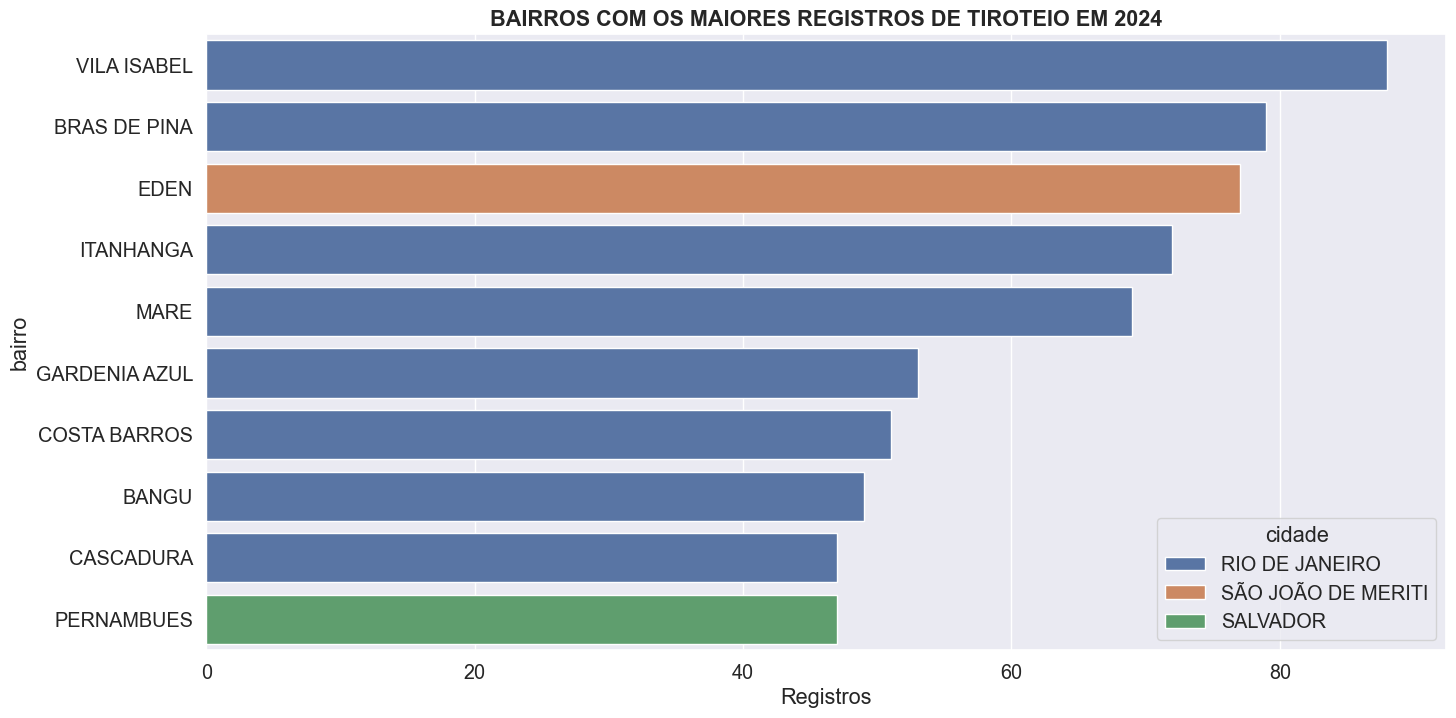

In [41]:
plt.figure(figsize=(16,8))
sns.barplot(bairros, x='Registros', y='bairro', hue='cidade')
plt.title('Bairros com os maiores registros de tiroteio em 2024'.upper(), fontdict={'fontweight':'bold'})
plt.savefig('barras_bairros.png', bbox_inches ="tight")
plt.show()

## 1.5 - Quantas crianças foram baleadas dentro de casa em 2024? E quantas delas morreram?

Há registros de sete crianças baleadas dentro de casa, das quais três morreram.

In [42]:
df_vitimas['faixa_etaria'].value_counts().to_frame()

,count
faixa_etaria,
Adulto,4867
Adolescente,232
Idoso,80
Criança,42
Não identificado,27
Feto,2


In [43]:
df_vitimas['local'].unique()

array(['Sem identificação', 'Bar', 'Outros', 'Residência', 'Automóvel',
       'Posto de gasolina', 'Barbearia', 'Evento', 'Lava jato',
       'Transporte público', 'Unidade de ensino'], dtype=object)

In [44]:
df_vitimas['situacao'].value_counts()

situacao
Morta     3578
Ferida    1672
Name: count, dtype: int64

In [45]:
df_vitimas.query('faixa_etaria == "Criança" and local == "Residência"').shape

(7, 39)

In [46]:
df_vitimas.query('faixa_etaria == "Criança" and local == "Residência" and situacao == "Morta"').shape

(3, 39)

## 1.6 - Quantos garis (funcionários de limpeza urbana) foram baleados em 2024?
Não há registro de funcionários de limpeza urbana nos dados disponibilizados.

In [51]:
df_vitimas['qualificacoes_vitima'].unique()

array(['Não identificado', 'PPTE', 'Outros,PPTE', 'Outros',
       'Mototaxista ', 'Motorista de aplicativo', 'Agente de segurança',
       'Entregador / Motoboy', 'Gestante,Outros', 'Rifeiro',
       'Agente de segurança,Político', 'Agente de segurança,Outros',
       'Político', 'Motorista de aplicativo,Mototaxista ',
       'Agente de segurança,Não identificado',
       'Entregador / Motoboy,Mototaxista ', 'Vendedor ambulante',
       'Motorista de aplicativo,Outros', 'Não identificado,Político',
       'Mototaxista ,Outros', 'Não identificado,Outros',
       'Agente de segurança,PPTE', 'Gestante',
       'Liderança comunitária,Outros', 'Liderança comunitária,Político',
       'Motorista de aplicativo,PPTE', 'PPTE,Rifeiro',
       'Liderança religiosa,Outros', 'Liderança religiosa',
       'Mototaxista ,Outros,PPTE',
       'Motorista de aplicativo,Mototaxista ,PPTE',
       'Outros,Vendedor ambulante', 'Entregador / Motoboy,PPTE',
       'Liderança comunitária'], dtype=object)

In [52]:
df_ocorrencias.columns

Index(['id_ocorrencia', 'uf', 'cidade', 'endereco', 'bairro', 'sub_bairro',
       'localidade', 'latitude', 'longitude', 'data_ocorrencia',
       'data de cadastro', 'última atualização', 'fonte_ocorrencia',
       'presenca_agentes', 'acao_policial', 'civis_mortos_ocorrencia',
       'civis_feridos_ocorrencia', 'agentes_mortos_ocorrencia',
       'agentes_feridos_ocorrencia', 'chacina_ocorrencia',
       'unidades_policiais', 'motivo_principal', 'motivos_complementares',
       'outros_recortes', 'transporte_interrompido', 'ocorrencia_relacionada'],
      dtype='object')